In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import sys
sys.path.append('../../../optimal-signal-demixing/')
from osd import Problem
from osd.components import (
    MeanSquareSmall, 
    AsymmetricNoise,
    ConstantChunks,
    LinearTrend
)
from osd.components.wrappers import make_columns_equal

In [3]:
T = 100
p = 3
X1 = .15 * np.random.randn(T, p)
use_set = np.random.uniform(size=(T, p)) >= 0.2
use_set[45:50] = False

# Linear (no constraint)

In [4]:
Xlt = np.tile(np.linspace(-0.5, 1.3, T), (p, 1)).T

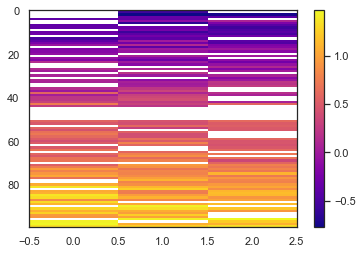

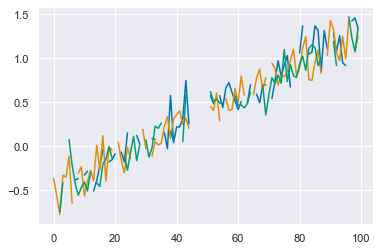

In [5]:
y1 = X1 + Xlt
y1[~use_set] = np.nan
with sns.axes_style('white'):
    plt.imshow(y1, aspect='auto', interpolation='none', cmap='plasma')
    plt.colorbar()
    plt.show()
plt.plot(y1)
plt.show()
c1 = [
    MeanSquareSmall(size=T*p),
    make_columns_equal(LinearTrend)
]
p1 = Problem(y1, c1)

In [6]:
p1.decompose(how='cvx', reset=True)

                                     CVXPY                                     
                                    v1.1.18                                    
(CVXPY) Jan 27 03:41:10 PM: Your problem has 600 variables, 3 constraints, and 2 parameters.
(CVXPY) Jan 27 03:41:10 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 27 03:41:10 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jan 27 03:41:10 PM: Compiling problem (target solver=OSQP).
(CVXPY) Jan 27 03:41:10 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) Jan 27 03:41:10 PM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 27 03:41:10 PM: Applying reduction Qp2SymbolicQp

In [7]:
p1.objective_value

0.01763657503760772

In [8]:
p1.problem.value

0.01763657503760772

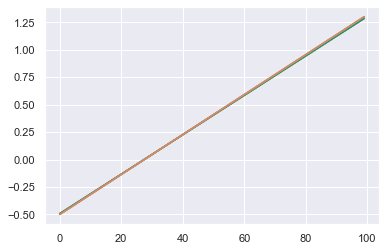

In [9]:
plt.plot(p1.estimates[1])
plt.plot(Xlt)

In [10]:
p1.decompose(how='admm', reset=True)

[====================] ...3 iterations, 0.01 sec -- obj_val: 2.14e-02, r: 3.97e-18, tol: 1.02e-05      



In [11]:
p1.objective_value

0.02136649405445078

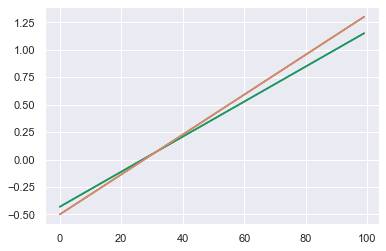

In [12]:
plt.plot(p1.estimates[1])
plt.plot(Xlt)

In [13]:
p1.decompose(how='bcd', reset=True)

Starting BCD...
y shape: (100, 3)
X shape: (2, 100, 3)

[====================] ...2 iterations, 0.00 sec -- obj_val: 1.76e-02, r: 1.36e-18, tol: 1.02e-05      



In [14]:
p1.objective_value

0.017646442301709822

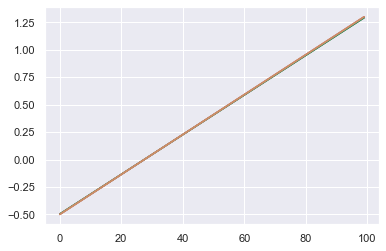

In [15]:
plt.plot(p1.estimates[1])
plt.plot(Xlt)

# Linear with first value constraint

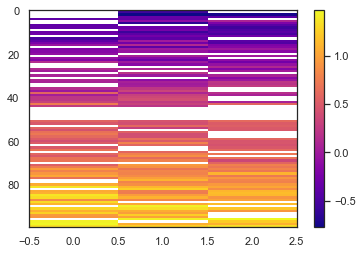

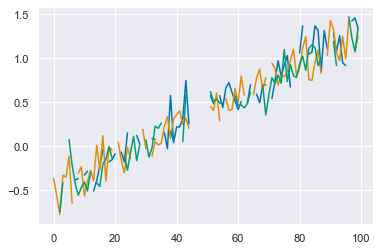

In [16]:
y1 = X1 + Xlt
y1[~use_set] = np.nan
with sns.axes_style('white'):
    plt.imshow(y1, aspect='auto', interpolation='none', cmap='plasma')
    plt.colorbar()
    plt.show()
plt.plot(y1)
plt.show()
c1 = [
    MeanSquareSmall(size=T*p),
    make_columns_equal(LinearTrend)(first_val=-0.5)
]
p1 = Problem(y1, c1)

In [17]:
p1.decompose(how='cvx', reset=True)

                                     CVXPY                                     
                                    v1.1.18                                    
(CVXPY) Jan 27 03:41:28 PM: Your problem has 600 variables, 4 constraints, and 2 parameters.
(CVXPY) Jan 27 03:41:28 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 27 03:41:28 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jan 27 03:41:28 PM: Compiling problem (target solver=OSQP).
(CVXPY) Jan 27 03:41:28 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) Jan 27 03:41:28 PM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 27 03:41:28 PM: Applying reduction Qp2SymbolicQp

In [18]:
p1.objective_value

0.01764664623576445

In [19]:
p1.problem.value

0.017646646235764448

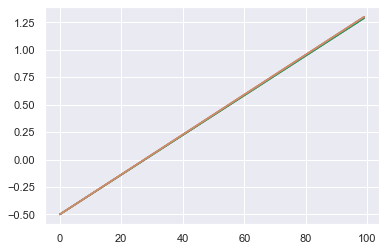

In [20]:
plt.plot(p1.estimates[1])
plt.plot(Xlt)

In [21]:
p1.decompose(how='admm', reset=True)

[====================] ...49 iterations, 0.10 sec -- obj_val: 1.76e-02, r: 4.21e-06, tol: 1.02e-05      



In [22]:
p1.objective_value

0.017646649324551178

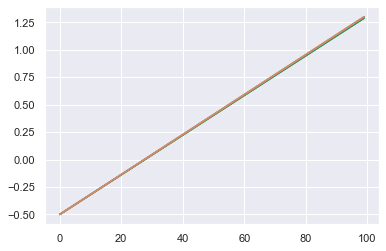

In [23]:
plt.plot(p1.estimates[1])
plt.plot(Xlt)

In [24]:
p1.decompose(how='bcd', reset=True)

Starting BCD...
y shape: (100, 3)
X shape: (2, 100, 3)

[====================] ...2 iterations, 0.00 sec -- obj_val: 1.77e-02, r: 1.79e-18, tol: 1.02e-05      



In [25]:
p1.objective_value

0.01765408617755764

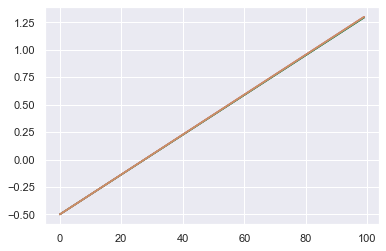

In [26]:
plt.plot(p1.estimates[1])
plt.plot(Xlt)

# Asymmetric noice

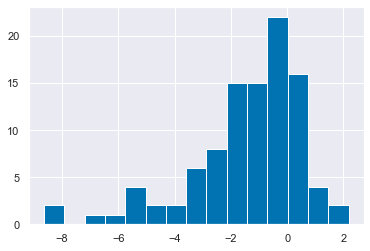

In [27]:
from scipy.stats import laplace_asymmetric
kappa = 2
np.random.seed(110100100)
al = laplace_asymmetric.rvs(kappa, size=T)
Xan = np.tile(al, (p, 1)).T
plt.hist(al, bins=15);

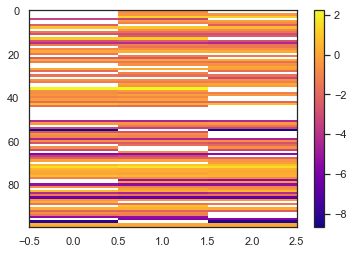

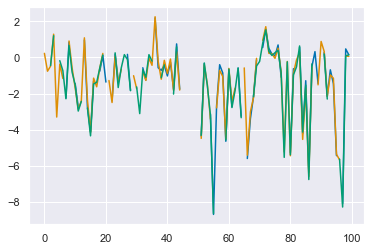

In [28]:
y2 = X1 + Xan
y2[~use_set] = np.nan
with sns.axes_style('white'):
    plt.imshow(y2, aspect='auto', interpolation='none', cmap='plasma')
    plt.colorbar()
    plt.show()
plt.plot(y2)
plt.show()
c2 = [
    MeanSquareSmall(size=T*p),
    make_columns_equal(AsymmetricNoise)(weight=1/(T*p), tau=0.8)
]
p2 = Problem(y2, c2)

In [29]:
p2.decompose(how='cvx', reset=True)

                                     CVXPY                                     
                                    v1.1.18                                    
(CVXPY) Jan 27 03:41:43 PM: Your problem has 600 variables, 2 constraints, and 3 parameters.
(CVXPY) Jan 27 03:41:43 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 27 03:41:43 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jan 27 03:41:43 PM: Compiling problem (target solver=OSQP).
(CVXPY) Jan 27 03:41:43 PM: Reduction chain: EvalParams -> CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) Jan 27 03:41:43 PM: Applying reduction EvalParams
(CVXPY) Jan 27 03:41:43 PM: Applying reduction Cvx

/Users/bennetmeyers/miniconda3/envs/pvi-dev/lib/python3.7/site-packages/cvxpy/reductions/solvers/solving_chain.py:167: UserWarning: You are solving a parameterized problem that is not DPP. Because the problem is not DPP, subsequent solves will not be faster than the first one. For more information, see the documentation on Discplined Parametrized Programming, at
	https://www.cvxpy.org/tutorial/advanced/index.html#disciplined-parametrized-programming
  warnings.warn(dpp_error_msg)


In [30]:
p2.objective_value

0.3595698836284906

In [31]:
p2.problem.objective.value

0.3595698836284906

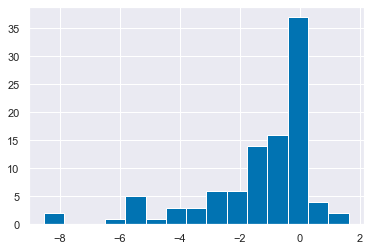

In [32]:
plt.hist(p2.estimates[1,:, 0], bins=15);

In [33]:
p2.decompose(how='admm', reset=True)

[====================] ...3 iterations, 0.01 sec -- obj_val: 4.71e-01, r: 1.90e-17, tol: 1.05e-05      



In [34]:
p2.objective_value

0.47122864866853154

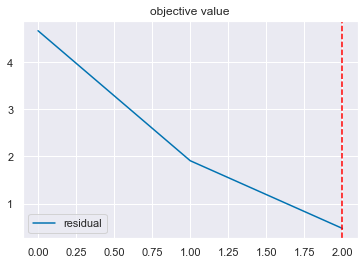

In [35]:
plt.figure()
plt.plot(p2.admm_result['obj_vals'], label='residual')
plt.axvline(p2.admm_result['it'], color='red', ls='--')
# plt.yscale('log')
plt.legend()
plt.title('objective value')
plt.show()

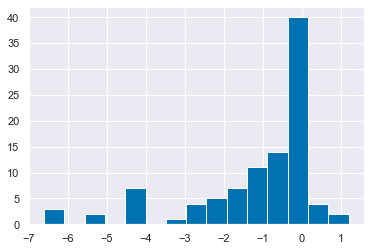

In [36]:
plt.hist(p2.estimates[1,:, 0], bins=15);

In [37]:
p2.decompose(how='bcd', reset=True)

Starting BCD...
y shape: (100, 3)
X shape: (2, 100, 3)

[====================] ...2 iterations, 0.00 sec -- obj_val: 3.64e-01, r: 1.93e-18, tol: 1.02e-05      



In [38]:
p2.objective_value

0.3635180864954584

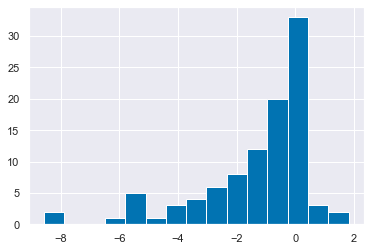

In [39]:
plt.hist(p2.estimates[1,:, 0], bins=15);

In [40]:
import cvxpy as cvx

In [41]:
x = cvx.Variable(y2.shape)

In [44]:
cost = p2.components[-1].cost(x) + 1/2 * cvx.sum_squares(x[use_set] - y2[use_set])
constraints = [cvx.diff(x, axis=1) == 0]
cvx_prox = cvx.Problem(cvx.Minimize(cost), constraints)

In [45]:
cvx_prox.solve()

97.85908094920003

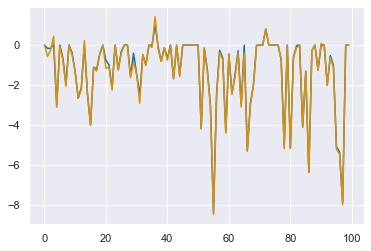

In [46]:
plt.plot(x.value[:, 0])
plt.plot(p2.components[-1].prox_op(y2, 1, 1, use_set=use_set)[:, 0])

# Constant chunks

In [48]:
np.random.seed(110100100)
cs = 17
v = np.random.uniform(-1, 1, T // 7 + 1)
z = np.tile(v, (7, 1))
z = z.ravel(order='F')
z = z[:100]
Xch = np.tile(z, (p, 1)).T

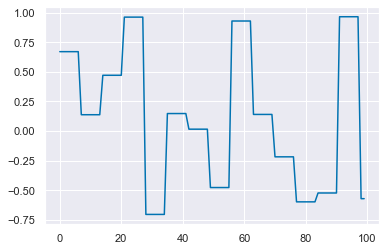

In [49]:
plt.plot(z)

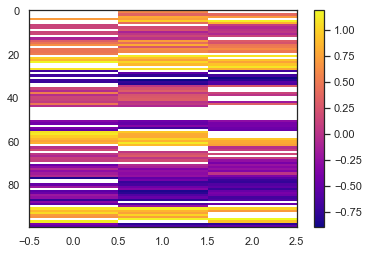

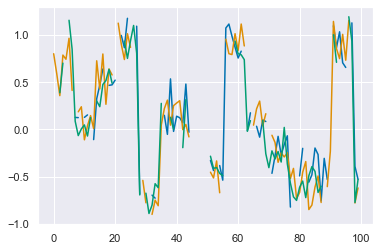

In [50]:
y3 = X1 + Xch
y3[~use_set] = np.nan
with sns.axes_style('white'):
    plt.imshow(y3, aspect='auto', interpolation='none', cmap='plasma')
    plt.colorbar()
    plt.show()
plt.plot(y3)
plt.show()
c3 = [
    MeanSquareSmall(size=T*p),
    make_columns_equal(ConstantChunks)(length=7)
]
p3 = Problem(y3, c3)

In [51]:
p3.decompose(how='cvx', reset=True)

                                     CVXPY                                     
                                    v1.1.18                                    
(CVXPY) Jan 27 03:42:37 PM: Your problem has 600 variables, 17 constraints, and 2 parameters.
(CVXPY) Jan 27 03:42:37 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 27 03:42:37 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jan 27 03:42:37 PM: Compiling problem (target solver=OSQP).
(CVXPY) Jan 27 03:42:37 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) Jan 27 03:42:37 PM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 27 03:42:37 PM: Applying reduction Qp2SymbolicQ

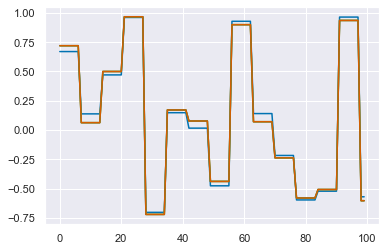

In [52]:
plt.plot(z)
plt.plot(p3.estimates[1])

In [53]:
p3.objective_value

0.016565786642939888

In [54]:
p3.decompose(how='admm', reset=True)

[====================] ...3 iterations, 0.01 sec -- obj_val: 2.29e-02, r: 3.96e-18, tol: 1.02e-05      



In [55]:
p3.objective_value

0.022896985356284955

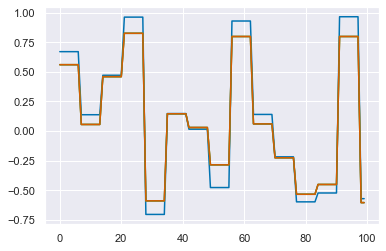

In [56]:
plt.plot(z)
plt.plot(p3.estimates[1])

In [57]:
p3.decompose(how='bcd', reset=True)

Starting BCD...
y shape: (100, 3)
X shape: (2, 100, 3)

[====================] ...2 iterations, 0.00 sec -- obj_val: 1.66e-02, r: 1.55e-18, tol: 1.01e-05      



In [58]:
p3.objective_value

0.016565786642939888

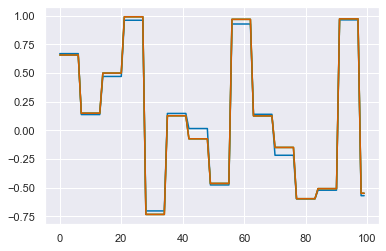

In [133]:
plt.plot(z)
plt.plot(p3.estimates[1])

In [66]:
x = cvx.Variable(y3.shape)

In [70]:
cost = p3.components[-1].cost(x) + 1/2 * cvx.sum_squares(x[use_set] - y3[use_set])
constraints = [cvx.diff(x, axis=1) == 0]
constraints.extend(p3.components[-1].internal_constraints(x, T, p))
cvx_prox = cvx.Problem(cvx.Minimize(cost), constraints)

In [71]:
cvx_prox.solve()

2.4848679964409826

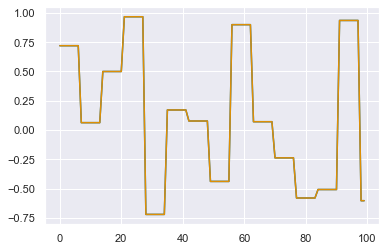

In [72]:
plt.plot(x.value[:, 0])
plt.plot(p3.components[-1].prox_op(y3, 1, 1, use_set=use_set)[:, 0])